<h1>Speed Dating: Who to Date Long Term</h1>

What influences love at first sight? (Or, at least, love in the first four minutes?) This dataset was compiled by Columbia Business School professors Ray Fisman and Sheena Iyengar for their paper Gender Differences in Mate Selection: Evidence From a Speed Dating Experiment.<br>

Data was gathered from participants in experimental speed dating events from 2002-2004. During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests.<br>

The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include: demographics, dating habits, self-perception across key attributes, beliefs on what others find valuable in a mate, and lifestyle information. See the Speed Dating Data Key document below for details.<br>

For more analysis from Iyengar and Fisman, read Racial Preferences in Dating.<br>

Data Exploration Ideas<br>

What are the least desirable attributes in a male partner? Does this differ for female partners?<br>
How important do people think attractiveness is in potential mate selection vs. its real impact?<br>
Are shared interests more important than a shared racial background?<br>
Can people accurately predict their own perceived value in the dating market?<br>
In terms of getting a second date, is it better to be someone's first speed date of the night or their last?

<h2>Import Libraries</h2>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

print('pandas version is {}.'.format(pd.__version__))
print('numpy version is {}.'.format(np.__version__))
print('scikit-learn version is {}.'.format(sklearn.__version__))
print('seaborn version is {}.'.format(sns.__version__))
print('matplotlib version is {}.'.format(matplotlib.__version__))

pandas version is 0.18.0.
numpy version is 1.10.4.
scikit-learn version is 0.17.1.
seaborn version is 0.7.1.
matplotlib version is 1.5.1.


In [2]:
data = pd.read_csv("Speed Dating Data.csv")
print "This set has {} data points and {} features.".format(*data.shape)

This set has 8378 data points and 195 features.


<h1>Data Exploration</h1>

<h4>Samples for each Feature</h4>

In [3]:
import features_creator as fc #importing feature names made in file features_creator.py
fc.count_samples_in_features(data)#count samples for each feature

Total Number of features: 195
wave 8378 ||| samerace 8378 ||| round 8378 ||| position 8378 ||| partner 8378 ||| order 8378 ||| match 8378 ||| iid 8378 ||| idg 8378 ||| gender 8378 ||| dec_o 8378 ||| dec 8378 ||| condtn 8378 ||| id 8377 ||| pid 8368 ||| race 8315 ||| field 8315 ||| race_o 8305 ||| yoga 8299 ||| tvsports 8299 ||| tv 8299 ||| theater 8299 ||| sports 8299 ||| sinc2_1 8299 ||| sinc1_1 8299 ||| shopping 8299 ||| reading 8299 ||| music 8299 ||| museums 8299 ||| movies 8299 ||| intel2_1 8299 ||| intel1_1 8299 ||| imprelig 8299 ||| imprace 8299 ||| hiking 8299 ||| goal 8299 ||| go_out 8299 ||| gaming 8299 ||| fun2_1 8299 ||| from 8299 ||| exercise 8299 ||| dining 8299 ||| concerts 8299 ||| clubbing 8299 ||| attr2_1 8299 ||| attr1_1 8299 ||| art 8299 ||| field_cd 8296 ||| shar2_1 8289 ||| pf_o_sin 8289 ||| pf_o_int 8289 ||| pf_o_att 8289 ||| fun1_1 8289 ||| career 8289 ||| amb2_1 8289 ||| age 8283 ||| date 8281 ||| pf_o_fun 8280 ||| amb1_1 8279 ||| exphappy 8277 ||| age_o 8274 |

<h4>Features Space of interest (with most samples avalaible)</h4>

In [4]:
fc.count_samples_in_features(data[fc.feature_space])

Total Number of features: 77
samerace 8378 ||| order 8378 ||| iid 8378 ||| gender 8378 ||| pid 8368 ||| race 8315 ||| race_o 8305 ||| yoga 8299 ||| tvsports 8299 ||| tv 8299 ||| theater 8299 ||| sports 8299 ||| sinc2_1 8299 ||| sinc1_1 8299 ||| shopping 8299 ||| reading 8299 ||| music 8299 ||| museums 8299 ||| movies 8299 ||| intel2_1 8299 ||| intel1_1 8299 ||| imprelig 8299 ||| imprace 8299 ||| hiking 8299 ||| goal 8299 ||| go_out 8299 ||| gaming 8299 ||| fun2_1 8299 ||| exercise 8299 ||| dining 8299 ||| concerts 8299 ||| clubbing 8299 ||| attr2_1 8299 ||| attr1_1 8299 ||| art 8299 ||| field_cd 8296 ||| shar2_1 8289 ||| pf_o_sin 8289 ||| pf_o_int 8289 ||| pf_o_att 8289 ||| fun1_1 8289 ||| amb2_1 8289 ||| age 8283 ||| date 8281 ||| pf_o_fun 8280 ||| amb1_1 8279 ||| exphappy 8277 ||| age_o 8274 ||| sinc3_1 8273 ||| intel3_1 8273 ||| fun3_1 8273 ||| attr3_1 8273 ||| amb3_1 8273 ||| pf_o_amb 8271 ||| shar1_1 8257 ||| pf_o_sha 8249 ||| career_c 8240 ||| int_corr 8220 ||| attr 8176 ||| attr

<h4>Data Clean Up: Making Sure Features are within Range</h4>

In [5]:
fc.likert_scale_question_3(data)#Scale from 0 - 10. Bring fix rating of 12 to 10
fc.scale_question_3(data)#change to scale from 0 - 100, force that features add to 100
fc.scale_question_4(data)#change to scale from 0 - 100, force that features add to 100
fc.scale_question_5(data)#change to scale from 0 - 100, force that features add to 100
fc.scale_question_1(data)#force that features add to 100, if not the case
fc.scale_question_2(data)#force that features add to 100, if not the case
fc.scale_question_7(data)#force that features add to 100, if not the case
fc.scale_rating_received(data)#change to scale from 0 - 100, force that features add to 100
fc.scale_rating_given(data)#change to scale from 0 - 100, force that features add to 100
fc.scale_half_way(data)#change to scale from 0 - 100, force that features add to 100
fc.scale_half_way_2(data)#change to scale from 0 - 100, force that features add to 100
fc.scale_age(data)#change to scale from 0 - 1

<h4>Type Casting</h4>

In [6]:
fc.convert_income_to_float(data)#income was imported as string this call converts strings to float
fc.convert_tuition_to_float(data)#ditto, tuition was imported as strings and are converted to float
fc.zipcode_to_float(data)#zipcode strings converted to float
fc.sat_to_float(data)#this function converts sat scores to float

<h4>Outlier Detection: Turkey's Method</h4>

In [7]:
index_to_be_removed = fc.outlier_detection(data[fc.feature_space[10:72]]) 
#these indices span at least 15  features as outliers
print 'Outliers to be removed:', str(len(index_to_be_removed))
print index_to_be_removed
data.drop(data.index[index_to_be_removed], inplace = True)

Outliers to be removed: 239
[8203, 8209, 8219, 8359, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 8204, 720, 739, 8217, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 911, 920, 921, 951, 961, 981, 991, 1001, 8218, 1695, 1715, 1765, 1785, 1795, 1805, 1825, 1835, 1839, 1841, 1866, 1867, 1868, 1869, 1870, 8208, 8271, 8207, 4861, 5004, 5005, 5006, 5007, 5008, 5009, 5010, 5011, 5012, 5013, 5014, 5015, 5016, 5017, 5018, 5019, 5020, 5021, 5022, 5023, 5032, 5035, 5054, 5074, 5076, 5096, 5114, 5115, 5116, 5117, 5118, 5119, 5120, 5121, 5122, 5123, 5124, 5125, 5126, 5127, 5128, 5129, 5130, 5131, 5138, 5139, 5176, 5246, 5247, 5284, 5295, 5296, 5299, 5302, 5303, 5305, 5306, 5310, 5311, 5320, 5334, 5352, 5355, 5375, 5378, 5388, 5419, 5439, 5481, 5482, 5499, 5510, 5516, 5530, 5536, 5542, 5544, 5552, 5558, 5559, 5560, 5579, 5583, 5604, 5619, 5625, 5639, 5643, 5666, 5689, 5706, 5719, 5739, 5746, 5765, 5784, 5822, 59

<h4>Basic Stats for Unique Females</h4>

In [8]:
fc.dating_attributes_vs_time_describe(data = data, gender = 0)

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,intel3_1,fun3_1,amb3_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1
count,269.000000,269.000000,269.000000,269.000000,269.000000,268.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,268.000000,268.000000,268.000000,268.000000,268.000000,206.000000,206.000000,206.000000,206.000000,206.000000,205.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,18.021691,18.223927,20.976622,17.301078,12.820736,12.703169,35.538976,11.268870,12.463145,19.028923,9.094148,12.605938,18.296569,21.472370,21.044387,19.947872,19.238802,26.757879,13.576083,15.202743,17.378825,13.946456,13.202101,18.271149,21.117001,21.260948,19.328004,20.022898
std,9.926228,6.972031,6.815769,5.625226,5.459784,5.914279,16.755727,6.112427,5.112068,6.676802,5.299880,5.997143,2.739600,3.187740,2.343323,2.825029,3.443247,12.651663,6.338270,5.514926,5.669073,7.050208,5.603463,3.015640,3.732562,2.485745,3.582857,3.375210
min,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.555556,6.060606,12.000000,5.555556,8.823529,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.108108,5.128205,13.333333,6.250000,3.448276
25%,12.238776,15.000000,18.000000,15.000000,10.000000,10.000000,23.680000,5.000000,10.000000,15.000000,5.000000,10.000000,16.932624,20.000000,19.512195,18.421053,17.610294,18.181818,10.000000,10.000000,15.000000,10.000000,10.000000,16.666667,19.399642,20.000000,17.857143,18.421053
50%,15.220000,19.998000,20.000000,18.000000,15.000000,13.210000,30.000000,10.000000,11.361136,20.000000,10.000000,11.898810,18.512852,21.428571,20.512821,20.000000,20.000000,22.222222,14.142857,15.000000,18.000000,15.000000,13.725490,18.604651,21.276596,21.052632,19.444444,20.000000
75%,20.000000,20.000000,25.000000,20.000000,16.666667,16.000000,45.454545,15.000000,15.000000,21.950000,12.821282,16.668333,20.000000,23.529412,22.500000,21.428571,21.428571,30.000000,18.136364,19.403643,20.000000,17.291114,16.666667,20.000000,22.967033,22.500000,21.244358,21.951220
max,90.000000,60.000000,50.000000,40.000000,30.000000,30.000000,100.000000,30.000000,30.000000,50.000000,30.000000,30.000000,26.470588,32.000000,30.303030,30.303030,28.571429,80.000000,35.000000,30.000000,40.909091,50.000000,36.363636,25.641026,31.034483,30.769231,38.461538,29.032258


,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2
count,235.000000,236.000000,236.000000,236.000000,236.000000,236.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,236.000000,236.000000,236.000000,236.000000,236.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,21.778353,16.535924,19.034613,17.416526,11.447016,13.879850,32.951431,12.142168,12.571315,18.834753,9.705244,13.795089,18.692082,21.065240,21.000000,20.024676,19.218002,26.406461,14.932540,15.257669,16.784600,12.771589,13.847141,18.572104,21.013747,21.050205,19.741995,19.621950
std,11.981337,6.296840,6.197052,6.076373,5.201180,6.560728,15.049101,5.557777,4.708076,5.668503,4.688665,5.446185,2.608265,3.434576,2.513104,3.205923,3.506127,12.569193,5.827762,5.148632,5.339118,5.791222,5.454895,2.768506,3.208406,2.574566,3.655138,3.332112
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,5.000000,0.000000,0.000000,8.333333,7.407407,14.285714,3.846154,6.250000,10.000000,0.000000,2.000000,0.000000,0.000000,0.000000,8.695652,10.714286,15.789474,6.451613,6.250000
25%,15.000000,14.752865,15.000000,15.000000,10.000000,10.000000,20.881047,10.000000,10.000000,15.000000,5.000000,10.000000,17.500000,20.000000,19.512195,18.604651,17.948718,17.349498,10.000000,10.000000,15.000000,10.000000,10.000000,17.142857,19.512195,20.000000,17.948718,18.065268
50%,20.000000,17.390652,20.000000,17.390652,10.000000,15.000000,30.000000,12.767447,13.210000,20.000000,10.000000,15.000000,18.918919,21.052632,20.512821,20.000000,20.000000,21.951220,15.000000,15.000000,17.000000,11.363636,15.000000,18.918919,21.052632,20.588235,20.000000,20.000000
75%,25.000000,20.000000,20.000000,20.000000,15.000000,17.883840,40.000000,15.622653,15.217717,20.257051,13.951395,17.230838,20.000000,22.759740,22.222222,21.476834,21.092504,30.000000,19.098278,18.181818,20.000000,16.175249,17.073171,20.000000,22.967033,21.951220,21.807065,21.212121
max,85.000000,50.000000,40.000000,50.000000,22.220000,35.000000,85.000000,25.000000,30.773077,40.000000,20.000000,30.000000,30.769231,34.615385,31.818182,30.000000,31.818182,85.000000,35.000000,40.000000,40.000000,35.000000,30.000000,28.571429,33.333333,33.333333,34.782609,33.333333


,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,105.000000,105.000000,105.000000,105.000000,105.000000,73.000000,145.000000,145.000000,145.000000,145.000000,145.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,20.592010,17.319681,19.869791,15.847121,12.234521,14.136876,32.208994,13.773868,14.001243,19.948861,10.641136,13.557799,18.752925,21.312921,21.157257,20.057535,18.719362,26.817467,14.897576,14.160300,16.574280,13.186574,14.363803,18.890404,21.899522,21.308145,19.535263,18.366666
std,11.913355,8.213985,6.182444,5.189896,5.641315,6.874221,14.430972,7.470097,5.541292,6.879484,6.379227,7.668814,2.670723,3.355513,2.504509,2.739258,3.706615,13.537720,5.356146,5.157183,5.763139,6.756474,6.471774,3.103665,4.123521,2.649331,3.621574,4.007879
min,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.142857,12.500000,12.500000,6.060606,3.571429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.333333,9.677419,16.666667,3.703704,3.571429
25%,15.000000,15.000000,16.666667,12.000000,10.000000,10.000000,22.727273,10.000000,10.000000,18.000000,5.000000,10.000000,17.391304,19.565217,20.000000,18.918919,17.391304,17.073171,10.000000,10.000000,14.634146,10.000000,10.000000,17.647059,20.000000,20.000000,17.500000,17.073171
50%,16.666667,17.390000,20.000000,16.326735,15.000000,15.000000,26.315789,15.000000,15.000000,20.000000,10.000000,15.000000,19.148936,21.052632,20.930233,20.000000,19.565217,20.000000,15.000000,15.000000,16.666667,14.634146,15.000000,19.047619,21.875000,20.833333,20.000000,18.918919
75%,22.500000,20.000000,20.000000,20.000000,15.908409,18.000000,40.000000,20.000000,18.181818,22.500000,15.789474,19.000000,20.454545,23.076923,22.222222,21.428571,21.052632,30.000000,17.647059,16.666667,20.000000,17.021277,16.666667,20.512821,23.255814,21.951220,21.428571,20.588235
max,75.000000,65.000000,40.000000,33.333333,30.000000,55.000000,80.000000,50.000000,30.000000,40.000000,25.000000,45.000000,25.000000,40.000000,30.000000,29.166667,29.166667,80.000000,40.000000,30.000000,35.294118,40.000000,45.000000,25.806452,41.176471,33.333333,29.166667,29.166667


<h4>Frequency Charts for Females</h4>

C:\Users\Henry\Anaconda2\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


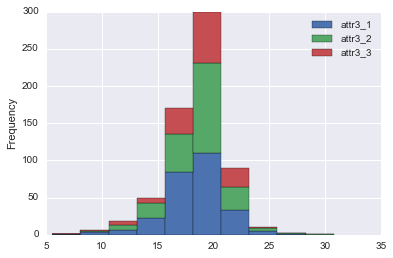

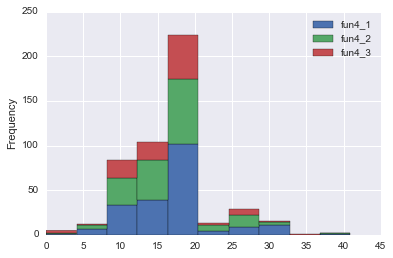

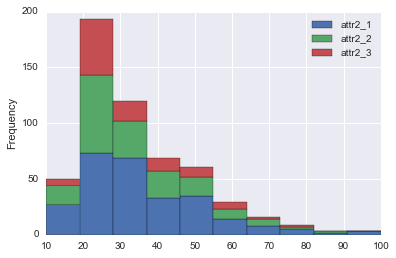

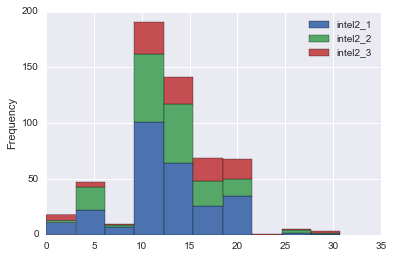

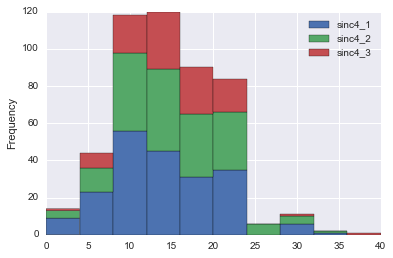

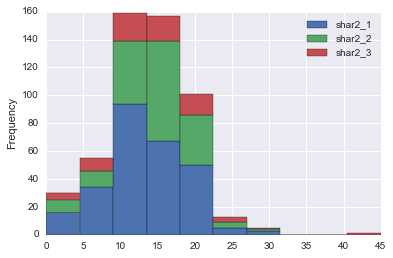

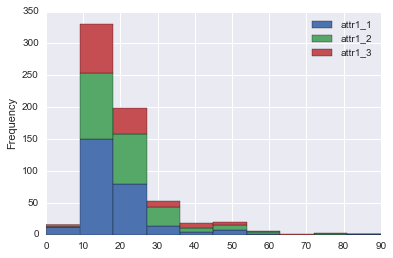

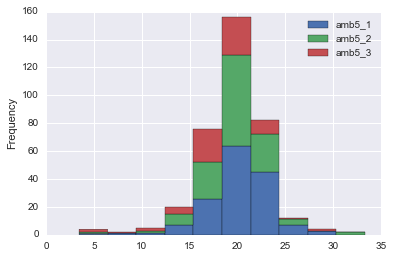

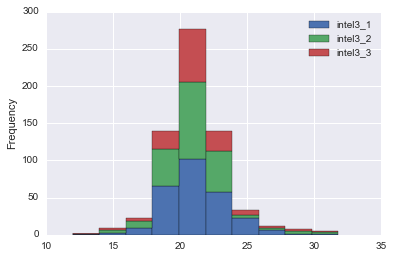

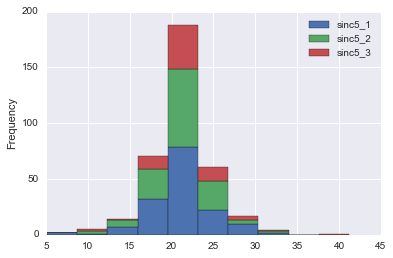

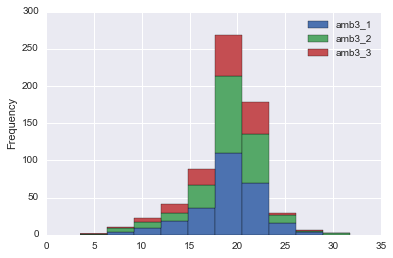

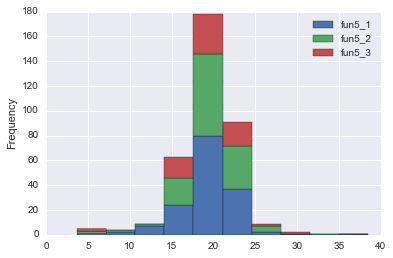

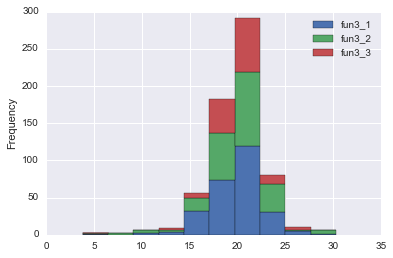

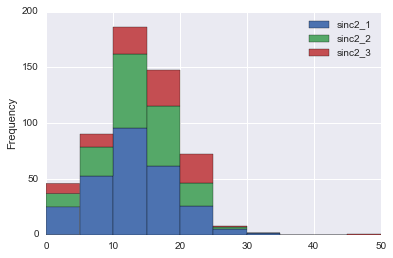

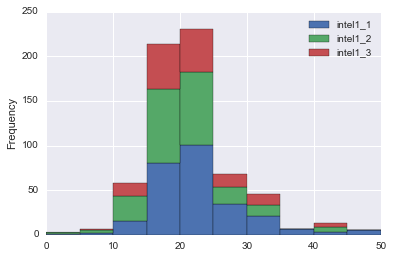

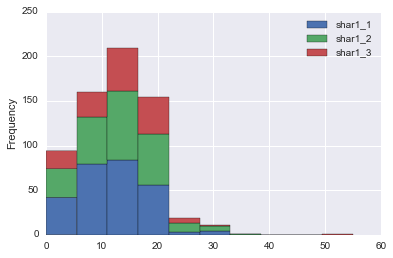

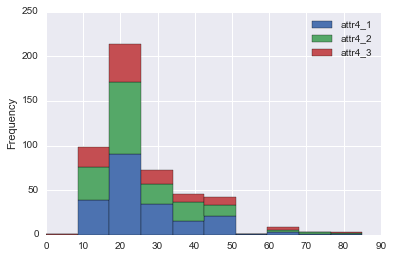

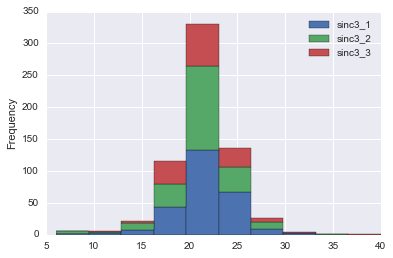

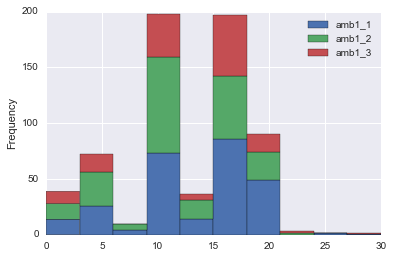

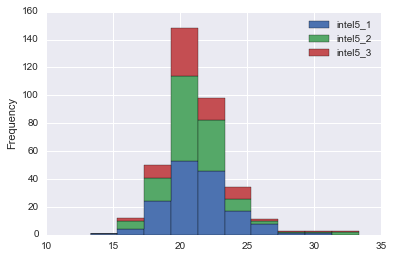

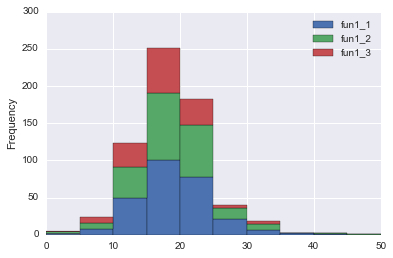

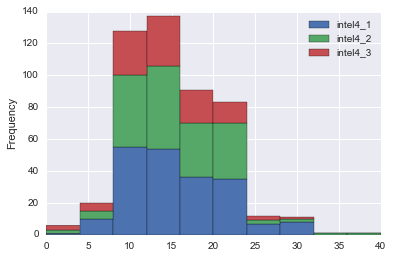

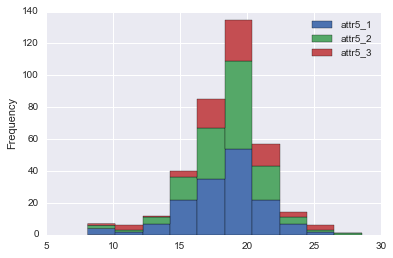

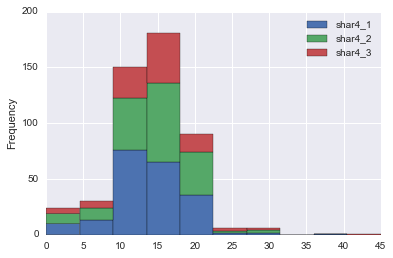

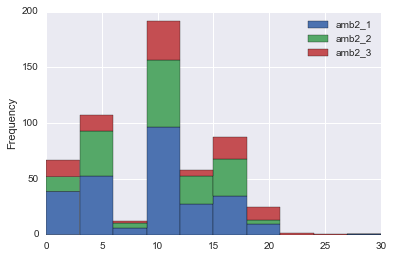

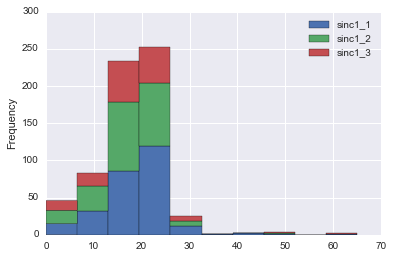

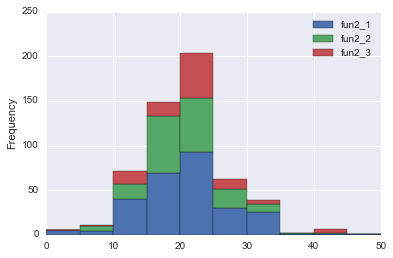

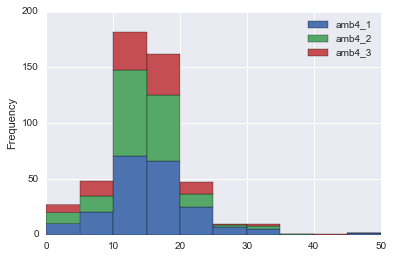

In [9]:
fc.dating_attributes_vs_time_hist(data = data, gender = 0)

<h4>Basic Stats for Unique Males</h4>

In [10]:
fc.dating_attributes_vs_time_describe(data = data, gender = 1)

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,intel3_1,fun3_1,amb3_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1
count,274.000000,274.000000,274.000000,273.000000,272.000000,272.000000,274.000000,274.000000,274.000000,274.000000,273.000000,273.000000,274.000000,274.000000,274.000000,274.000000,274.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,26.978071,16.400416,19.432874,17.639999,8.777947,10.979286,24.794999,15.186220,16.398161,18.089514,14.417761,11.206865,17.960077,21.164612,22.133353,19.390670,19.351288,31.601991,12.993497,14.131770,18.873019,9.427633,12.972091,18.093822,20.671308,22.247865,19.289024,19.697982
std,13.392339,7.249770,6.807105,6.645654,5.925262,6.834237,12.524439,7.119947,6.583136,6.519574,7.070485,6.009915,2.702512,3.631589,2.733306,3.236363,3.905305,14.810754,6.751258,6.390167,6.519549,6.243737,6.010194,3.469296,4.075802,3.039916,4.096715,4.166046
min,6.669333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.571429,5.405405,16.216216,6.250000,6.250000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.896552,3.846154,16.000000,6.451613,2.857143
25%,19.146557,10.000000,16.166667,15.000000,5.000000,5.000000,16.746674,10.000000,10.250000,15.000000,10.000000,7.000000,16.279070,19.377240,20.000000,17.948718,17.500000,20.208333,10.000000,10.000000,15.000000,5.000000,10.000000,16.666667,18.634259,20.000000,17.445652,17.797888
50%,22.611111,16.980849,20.000000,18.000000,10.000000,10.000000,20.000000,15.000000,16.302553,19.098810,15.000000,10.000000,18.301435,21.052632,21.621622,20.000000,20.000000,28.348214,13.809524,15.000000,20.000000,10.000000,14.699074,18.181818,20.588235,21.951220,20.000000,20.000000
75%,30.000000,20.000000,22.221111,20.000000,13.039022,15.558444,30.000000,20.000000,20.000000,20.000000,20.000000,15.000000,20.000000,23.076923,23.529412,21.428571,21.739130,40.000000,17.311771,17.964286,20.588235,15.000000,16.666667,20.000000,22.222222,23.809524,21.621622,21.739130
max,100.000000,40.000000,42.855714,50.000000,35.810811,30.000000,80.000000,50.000000,40.000000,44.000000,50.000000,30.000000,25.000000,34.782609,36.000000,26.666667,28.125000,95.000000,35.000000,35.000000,40.000000,30.000000,30.000000,29.032258,36.363636,33.333333,32.258065,34.615385


,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2
count,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,245.000000,245.000000,245.000000,245.000000,245.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,30.180826,15.242469,16.758654,17.745964,8.521808,11.550279,25.208816,15.968439,15.621776,17.147527,14.145861,11.907582,18.375388,20.534464,22.102553,19.506974,19.480621,32.188398,13.164618,13.122436,18.481075,9.940821,13.102652,18.595479,19.647989,21.818984,19.707285,20.230263
std,15.473776,6.885171,6.685264,6.311559,5.713182,6.322024,13.154924,6.135575,5.537207,6.265335,6.494066,5.768562,2.882740,3.494401,2.569498,3.039726,3.867683,15.064678,5.835500,5.267915,7.014376,5.710118,6.597924,3.182253,3.264090,2.715135,3.097474,2.941531
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.666667,8.823529,17.500000,6.666667,6.666667,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.407407,6.451613,15.909091,10.714286,6.896552
25%,20.000000,10.000000,14.290000,15.000000,5.000000,8.510000,16.666667,10.132500,10.000000,15.000000,10.000000,10.000000,16.666667,18.918919,20.000000,17.948718,17.777778,20.649510,10.000000,10.000000,15.000000,5.000000,10.000000,17.073171,18.181818,20.000000,17.500000,18.512852
50%,25.000000,15.218478,18.000000,18.520000,10.000000,10.000000,20.000000,16.975000,16.304998,17.309135,15.000000,10.712157,18.604651,20.454545,21.739130,20.000000,20.000000,27.525253,14.434524,14.142857,19.023810,10.000000,14.763882,18.918919,20.000000,21.428571,20.000000,20.512821
75%,40.000000,20.000000,20.000000,20.000000,12.821282,15.000000,30.000000,20.000000,20.000000,20.000000,17.944111,15.513051,20.000000,22.222222,23.255814,21.212121,21.951220,40.000000,16.666667,16.000000,20.000000,14.583333,16.666667,20.000000,21.621622,22.967033,21.807065,21.913110
max,85.858586,30.000000,40.000000,40.000000,20.000000,30.000000,80.000000,40.000000,30.000000,40.000000,50.000000,30.000000,26.666667,34.782609,34.482759,29.629630,30.000000,100.000000,30.000000,30.000000,50.000000,30.000000,40.000000,28.125000,31.034483,31.250000,25.806452,32.142857


,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,87.000000,87.000000,87.000000,87.000000,87.000000,58.000000,117.000000,117.000000,117.000000,117.000000,117.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,29.084178,15.916996,18.864655,16.345548,8.942366,10.846256,25.741205,16.067270,17.398394,17.979691,16.226398,9.880563,18.503802,20.817371,22.467719,19.161638,19.049471,31.368108,12.271056,14.381268,18.270719,10.482515,13.226334,18.344717,20.088768,22.599015,19.229786,19.737714
std,14.688167,7.135591,6.239363,5.557305,5.827855,5.725295,11.644353,5.554214,7.019955,6.361846,7.437498,5.503116,2.907970,3.823389,2.985847,3.192066,3.485913,15.672050,5.657566,5.229427,6.132422,6.582404,5.704274,3.936085,3.645174,2.957164,3.766172,4.173454
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.142857,6.060606,17.142857,7.142857,8.333333,14.285714,0.000000,0.000000,0.000000,0.000000,0.000000,7.692308,7.692308,16.666667,8.000000,7.142857
25%,18.921892,10.000000,15.000000,13.636364,5.000000,5.000000,19.279907,10.000000,15.000000,15.000000,10.000000,5.000000,16.666667,19.047619,20.454545,17.948718,17.500000,20.000000,10.000000,10.357143,15.833333,5.000000,10.000000,16.666667,18.241627,20.469114,16.666667,17.647059
50%,23.260000,16.666667,20.000000,16.280000,10.000000,10.000000,20.000000,19.047619,19.148936,20.000000,15.789474,10.000000,18.918919,20.454545,21.951220,19.512195,20.000000,25.000000,12.121212,15.000000,20.000000,10.000000,15.000000,18.750000,20.000000,22.540323,19.756098,19.478320
75%,40.000000,20.000000,20.000000,20.000000,14.287143,15.000000,30.000000,20.000000,20.000000,20.932416,20.000000,13.214286,20.000000,21.951220,23.684211,20.512821,21.428571,40.000000,16.472868,17.156863,20.000000,15.000000,16.833333,20.000000,21.811655,24.303849,21.428571,21.875000
max,80.000000,35.000000,45.000000,30.000000,20.000000,20.000000,80.000000,25.000000,60.000000,33.333333,50.000000,20.000000,26.666667,38.095238,34.615385,27.777778,28.571429,80.000000,22.000000,30.000000,35.714286,30.000000,25.000000,26.923077,32.142857,32.000000,28.571429,28.571429


<h4>Frequency Charts for Males</h4>

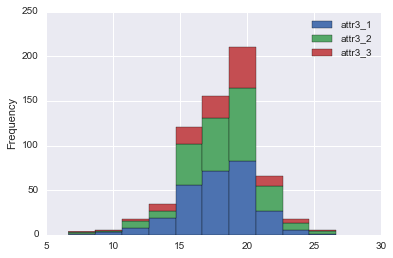

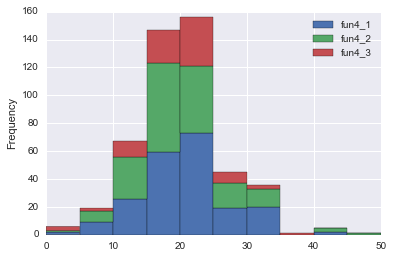

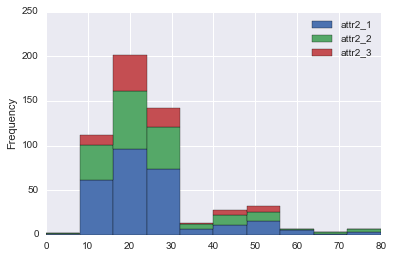

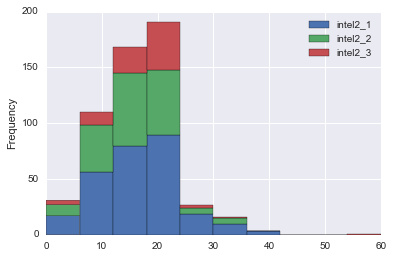

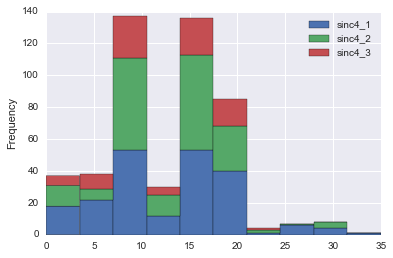

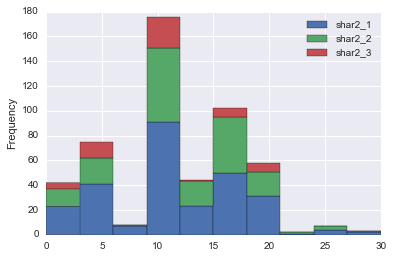

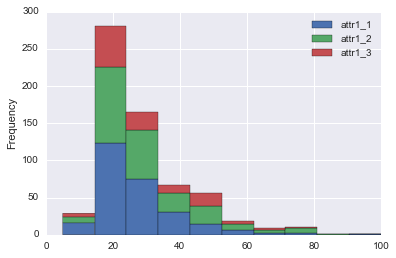

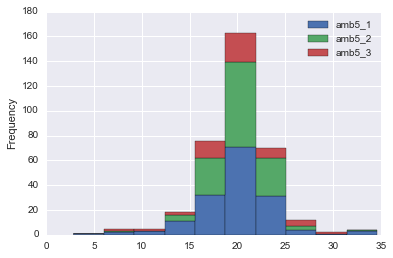

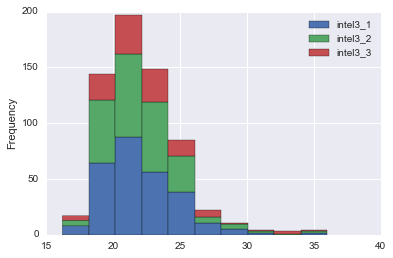

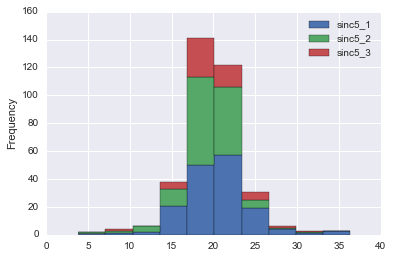

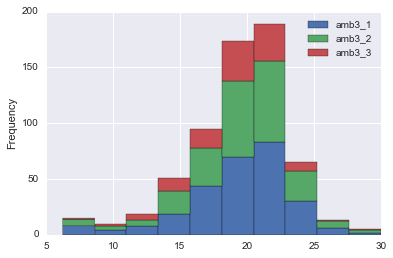

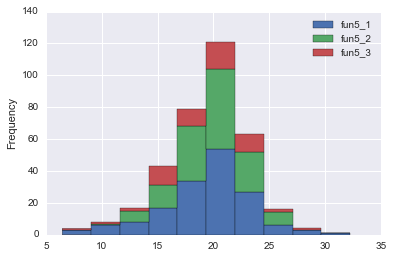

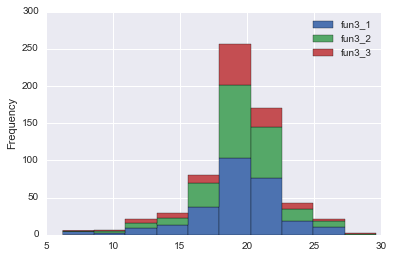

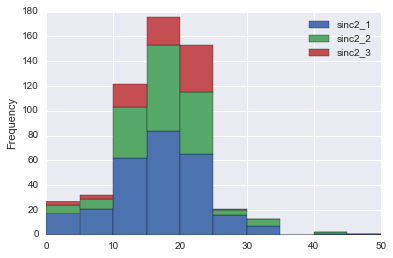

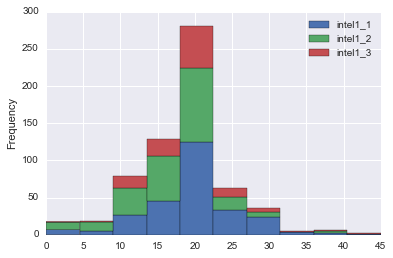

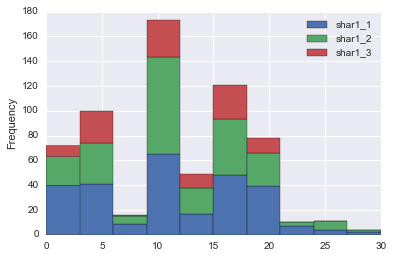

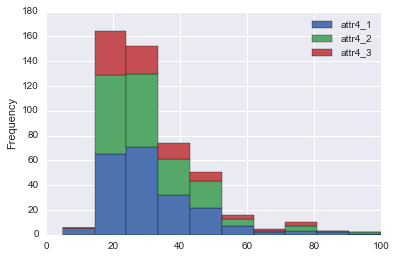

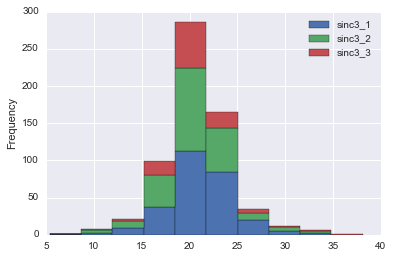

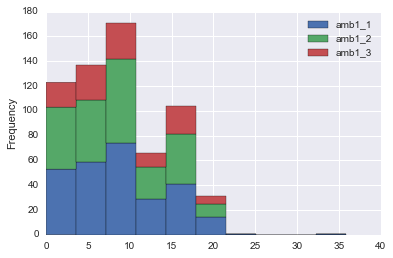

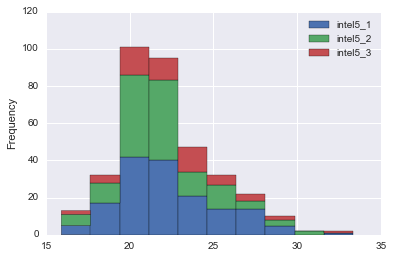

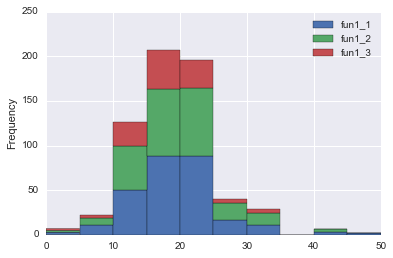

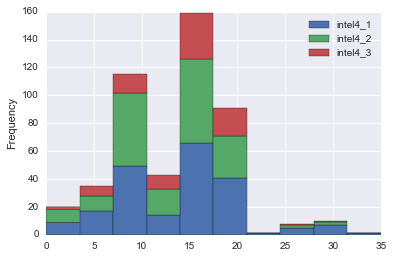

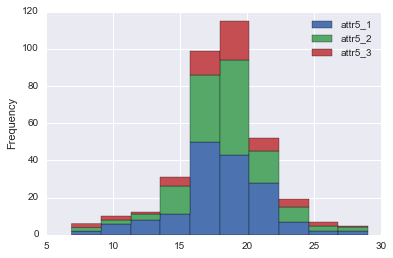

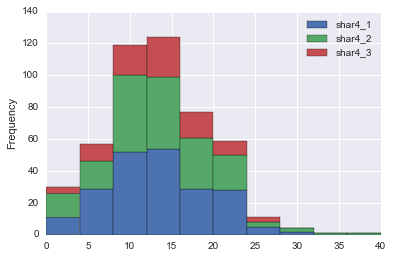

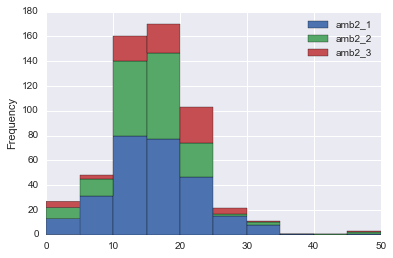

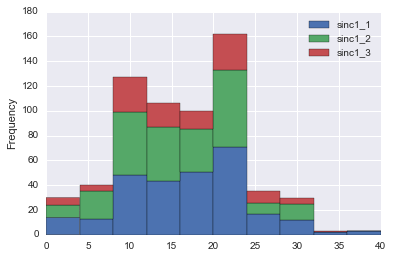

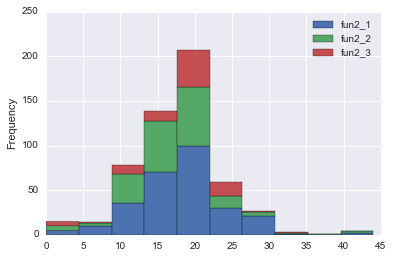

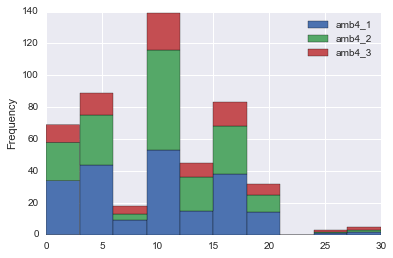

In [11]:
fc.dating_attributes_vs_time_hist(data = data, gender = 1)

<h4>Make a copy for Later use</h4>

In [12]:
data_copy = data.copy()#for analysis at the end of the ipynb file
#display(data_copy)

<h4>Scale Numerical features between 0 & 1</h4>

In [13]:
fc.scale_majority_of_features(data)#this function scales most features between 0 - 1
fc.scale_exphappy(data)

<h4>Correlation Heat Map: Both Genders</h4>

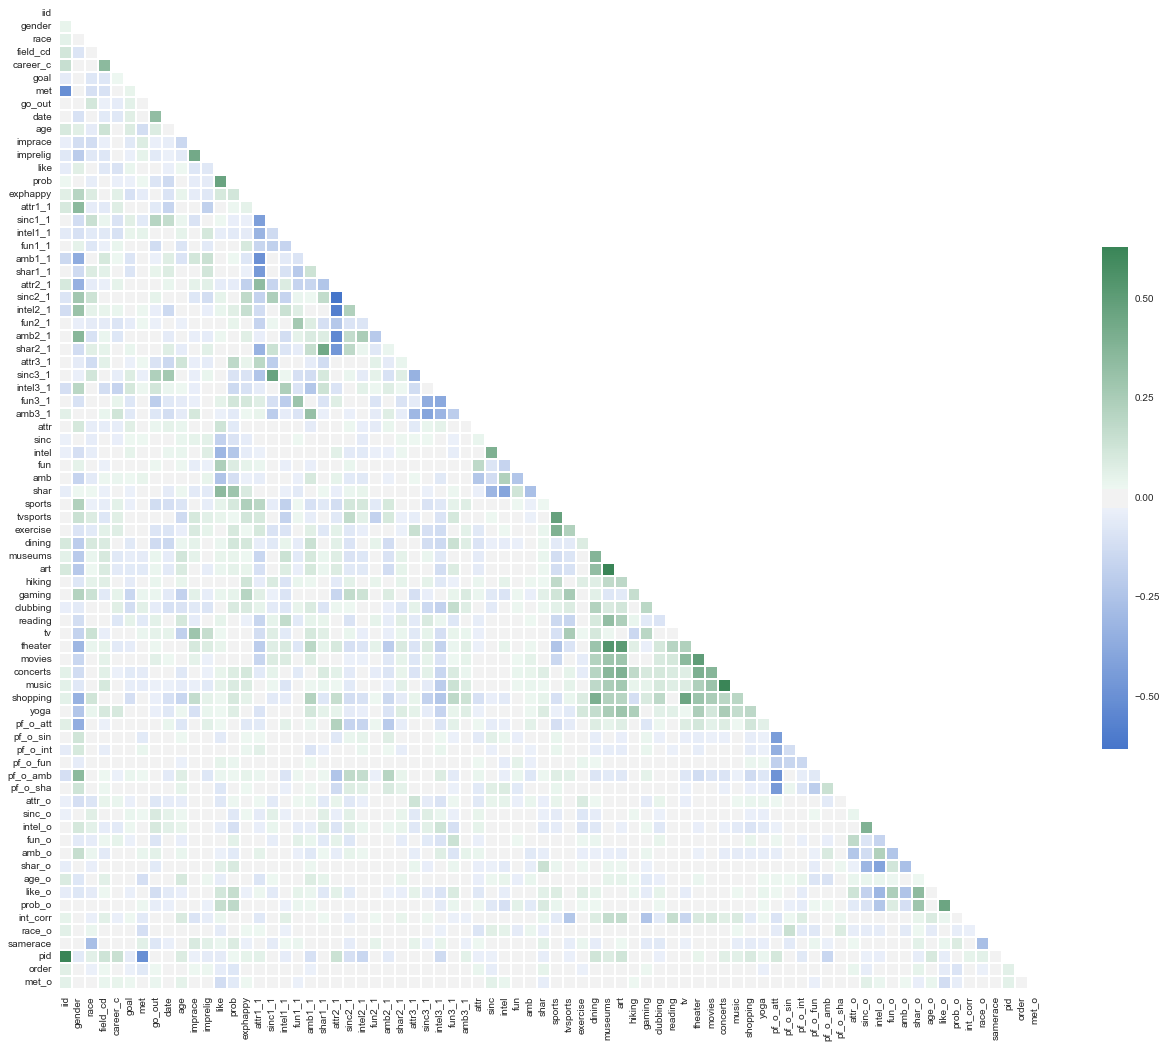

In [14]:
fc.make_corr(data[fc.feature_space])

<h4>Correlation Heat Map: Females</h4>

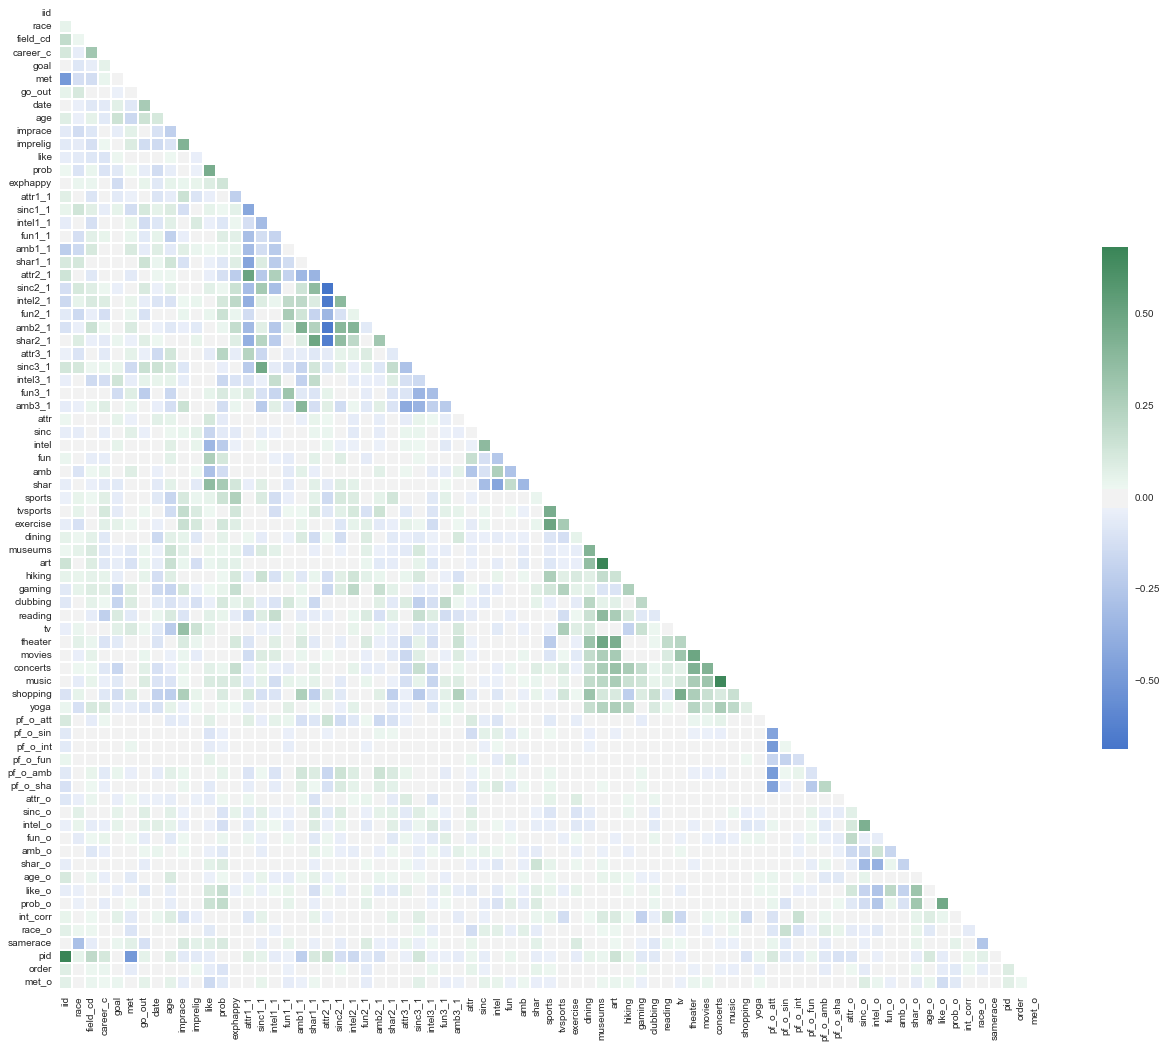

In [15]:
fc.make_corr(data[fc.feature_space][data['gender'] == 0].drop(labels = 'gender', axis = 1))

<h4>Correlation Heat Map: Males</h4>

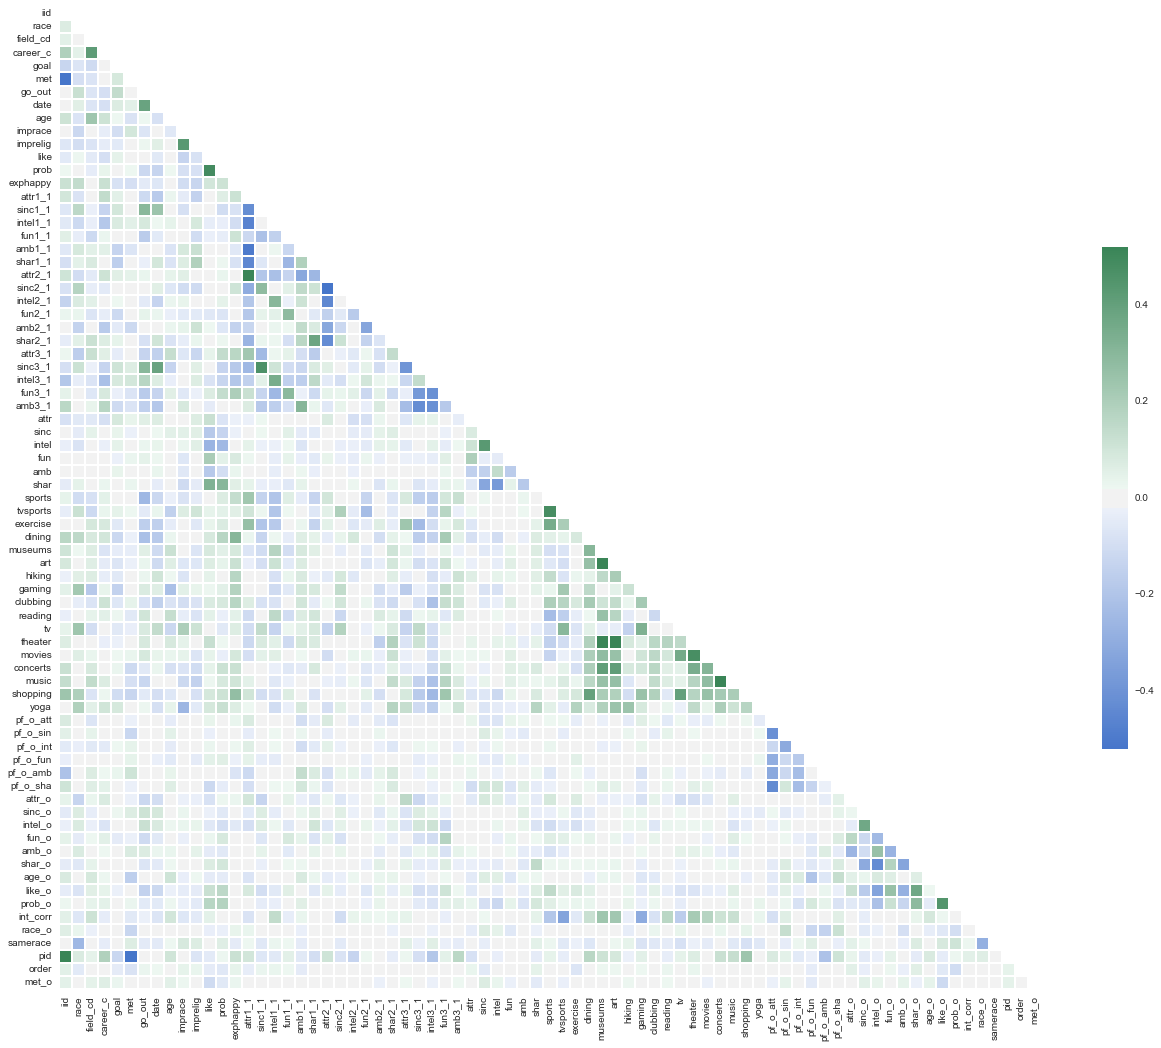

In [16]:
fc.make_corr(data[fc.feature_space][data['gender'] == 1].drop(labels = 'gender', axis = 1))

<h2>Forest Feature Selection: ExtraTreesClassifier & RandomForestClassifier</h2>

In [17]:
women_men = data[fc.all_space].copy()

In [18]:
women_men.dropna(axis = 0, how = 'any', inplace = True)

<h4>Both Genders</h4>

In [19]:
target_df = women_men['dec'].copy()
input_df = women_men[fc.feature_space].copy()

In [20]:
fc.forests(input_df, target_df)

ExtraTreesClassifier 				RandomForestClassifier
Old Space:  (4767, 77) 				Old Space: (4767, 77)
New Space:  (4767L, 22L) 				New Space: (4767L, 18L)
1 | (0.14090287439798246, 'like') 			1 | (0.15013219843025571, 'like')
2 | (0.035426615868321201, 'prob') 			2 | (0.051806606451013072, 'intel')
3 | (0.027959386209353738, 'attr') 			3 | (0.045203293116446552, 'attr')
4 | (0.027322028009490011, 'sinc') 			4 | (0.035415608819452798, 'amb')
5 | (0.02606742401167314, 'intel') 			5 | (0.029698254984769589, 'sinc')
6 | (0.021872618803974505, 'amb') 			6 | (0.029570636117514759, 'shar')
7 | (0.021814982990162327, 'shar') 			7 | (0.027922849938728889, 'prob')
8 | (0.020346643879573321, 'fun') 			8 | (0.02097332539641323, 'fun')
9 | (0.016695645258752688, 'prob_o') 			9 | (0.019144597390846653, 'pid')
10 | (0.016374651751902902, 'attr_o') 			10 | (0.017523658068946273, 'sinc_o')
11 | (0.015502346014165317, 'like_o') 			11 | (0.017493756190282653, 'attr_o')
12 | (0.014744656947368585, 'pf_o_sha') 

<h4>Females</h4>

In [21]:
fc.forests(input_df[input_df['gender'] == 0], target_df.loc[input_df[input_df['gender'] == 0].index])

ExtraTreesClassifier 				RandomForestClassifier
Old Space:  (2476, 77) 				Old Space: (2476, 77)
New Space:  (2476L, 26L) 				New Space: (2476L, 22L)
1 | (0.14730243644524915, 'like') 			1 | (0.14786471394670248, 'like')
2 | (0.029131552828197814, 'attr') 			2 | (0.036412951193620591, 'shar')
3 | (0.027016495077991726, 'intel') 			3 | (0.035585971526187067, 'intel')
4 | (0.025767383339927515, 'prob') 			4 | (0.033487144481813162, 'attr')
5 | (0.0253369262648943, 'shar') 			5 | (0.031941601022879351, 'sinc')
6 | (0.023416952543539392, 'sinc') 			6 | (0.030961564846812267, 'amb')
7 | (0.021202769845441134, 'fun') 			7 | (0.030148512592929888, 'prob')
8 | (0.019740852345290921, 'pf_o_att') 			8 | (0.026303268421533653, 'fun')
9 | (0.017888983057591196, 'amb') 			9 | (0.0240755442356861, 'pid')
10 | (0.017443101304829917, 'pid') 			10 | (0.019659976976178915, 'attr3_1')
11 | (0.017248817941606168, 'int_corr') 			11 | (0.018758373877073034, 'order')
12 | (0.017182433866129512, 'prob_o') 			

<h4>Males</h4>

In [22]:
fc.forests(input_df[input_df['gender'] == 1], target_df.loc[input_df[input_df['gender'] == 1].index])

ExtraTreesClassifier 				RandomForestClassifier
Old Space:  (2291, 77) 				Old Space: (2291, 77)
New Space:  (2291L, 19L) 				New Space: (2291L, 16L)
1 | (0.13556763591531021, 'like') 			1 | (0.12769852984972058, 'like')
2 | (0.045971764615005531, 'prob') 			2 | (0.056315465059536204, 'intel')
3 | (0.041686661984009006, 'attr') 			3 | (0.055594882240628661, 'attr')
4 | (0.028687973624257505, 'intel') 			4 | (0.046475604113499873, 'prob')
5 | (0.028154146197208761, 'fun') 			5 | (0.041092978640849334, 'sinc')
6 | (0.02412255158370865, 'sinc') 			6 | (0.036420356929631519, 'amb')
7 | (0.02322936119058621, 'shar') 			7 | (0.032991398767201655, 'fun')
8 | (0.022981584886719187, 'amb') 			8 | (0.026687195432770355, 'shar')
9 | (0.017095058365005637, 'prob_o') 			9 | (0.020257959195145239, 'fun_o')
10 | (0.01543221879683589, 'age_o') 			10 | (0.018572974897087334, 'pid')
11 | (0.014672884023236332, 'shar_o') 			11 | (0.017556837214503681, 'int_corr')
12 | (0.014318477264858989, 'int_corr') 	

<h2>Feature Selection: SelectKBest, F-Classifier</h2>

<h4>Both Genders</h4>

In [23]:
fc.f_classifier_selection(input_df, target_df)

SelectKBest: f_classif
1 (1798.0233114108228, 'like', 0.0)
2 (494.08763501835841, 'intel', 3.1001980447685445e-104)
3 (492.10055596115774, 'prob', 7.6419373453067022e-104)
4 (346.79407749817926, 'attr', 9.0106759855585969e-75)
5 (271.61105988880803, 'shar', 2.1651863001025901e-59)
6 (245.69708452431934, 'sinc', 4.9364782584994002e-54)
7 (225.47865730817472, 'amb', 7.844643665280404e-50)
8 (179.27438437812117, 'fun', 3.6838462837283036e-40)
9 (111.82571973414429, 'prob_o', 7.5299416054991148e-26)
10 (94.722460231871921, 'attr_o', 3.5200374326961384e-22)
11 (67.54356844348122, 'gender', 2.6306081290131098e-16)
12 (66.080081478821128, 'intel2_1', 5.4703140680530944e-16)
13 (56.190932639131972, 'imprace', 7.796470873488828e-14)
14 (54.190116184694581, 'exphappy', 2.1326311856960049e-13)
15 (40.454027065282006, 'imprelig', 2.2015774916634326e-10)
16 (39.441404274423775, 'attr2_1', 3.6813473330526517e-10)
17 (37.093155757081412, 'gaming', 1.2146837336982053e-09)
18 (36.267462970053529, 'exer

<h4>Females</h4>

In [24]:
fc.f_classifier_selection(input_df[input_df['gender'] == 0], target_df.loc[input_df[input_df['gender'] == 0].index])

SelectKBest: f_classif
1 (856.39407495786907, 'like', 6.4259410097617993e-162)
2 (218.87406649394737, 'intel', 1.6085088723840577e-47)
3 (199.37864253380258, 'prob', 1.343859549767069e-43)
4 (176.56280896249814, 'shar', 5.7172253120678089e-39)
5 (113.63707976939868, 'amb', 5.6768753084478471e-26)
6 (106.88992021075639, 'attr', 1.4764480117455438e-24)
7 (98.704171520774025, 'fun', 7.8002914982743429e-23)
8 (98.049103178868066, 'sinc', 1.0722098247584309e-22)
9 (70.130180910358476, 'prob_o', 9.1686164991544698e-17)
10 (48.263876018098571, 'exphappy', 4.7452897986748306e-12)
11 (44.607642496943576, 'attr_o', 2.9627831623132145e-11)
12 (41.927294463508616, 'pf_o_sin', 1.1386514542542869e-10)
13 (38.479955512352021, 'pf_o_att', 6.4640548108117549e-10)
14 (33.787649089220956, 'art', 6.9375650098385219e-09)
15 (32.572152702726846, 'exercise', 1.2855426719328453e-08)
16 (27.410023218248263, 'concerts', 1.784249548274645e-07)
17 (22.183396677342127, 'pf_o_sha', 2.6151041334581455e-06)
18 (20.05

C:\Users\Henry\Anaconda2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [1] are constant.
  UserWarning)


<h4>Males</h4>

In [25]:
fc.f_classifier_selection(input_df[input_df['gender'] == 1], target_df.loc[input_df[input_df['gender'] == 1].index])

SelectKBest: f_classif
1 (942.39749363354269, 'like', 1.2779212896704893e-173)
2 (314.9369216988087, 'prob', 4.0267517694084906e-66)
3 (257.78855820950685, 'intel', 4.7153524273808864e-55)
4 (221.32912555311481, 'attr', 7.4189188292549787e-48)
5 (169.82033431218315, 'sinc', 1.6893174578082561e-37)
6 (99.029337720870942, 'shar', 7.1970152666385205e-23)
7 (79.752736897008774, 'amb', 8.5105252499278492e-19)
8 (68.666952480352109, 'fun', 1.9600693526427411e-16)
9 (42.307859455097457, 'prob_o', 9.5451534903643376e-11)
10 (39.821940460699878, 'imprace', 3.329842214976698e-10)
11 (31.957868875926533, 'attr_o', 1.7717248462719655e-08)
12 (25.283752403831386, 'yoga', 5.3325190143680065e-07)
13 (23.590193899017002, 'intel2_1', 1.2725053406007437e-06)
14 (23.241147380864792, 'sports', 1.5228601097648103e-06)
15 (15.42521147331531, 'pf_o_sha', 8.8375087820289161e-05)
16 (15.259768976300943, 'pid', 9.6406416533477901e-05)
17 (14.252842141054071, 'attr2_1', 0.00016388643542960152)
18 (11.15609066014

<h4>Create Array of Selected Features</h4>

In [26]:
features_selected = ['like', 'attr', 'intel', 'shar', 'sinc', 'amb', 'fun', 'prob']
print features_selected

['like', 'attr', 'intel', 'shar', 'sinc', 'amb', 'fun', 'prob']


<h4>Chi2 Feature Selection: Both Genders</h4>

In [27]:
from sklearn import preprocessing
new_input_df = input_df.copy()
new_input_df['int_corr'] = (new_input_df - new_input_df.min()) / (new_input_df.max() - new_input_df.min())
new_input_df.drop(labels = ['iid', 'gender', 'race', 'field_cd','career_c', 'goal', 'date', 'zipcode', 'imprelig', 'imprace', 'prob_o', 'met', 'go_out', 
                            'race_o', 'samerace','pid','order', 'met_o'], axis = 1, inplace = True)

In [28]:
new_input_df.keys()

Index([u'age', u'like', u'prob', u'exphappy', u'attr1_1', u'sinc1_1',
       u'intel1_1', u'fun1_1', u'amb1_1', u'shar1_1', u'attr2_1', u'sinc2_1',
       u'intel2_1', u'fun2_1', u'amb2_1', u'shar2_1', u'attr3_1', u'sinc3_1',
       u'intel3_1', u'fun3_1', u'amb3_1', u'attr', u'sinc', u'intel', u'fun',
       u'amb', u'shar', u'sports', u'tvsports', u'exercise', u'dining',
       u'museums', u'art', u'hiking', u'gaming', u'clubbing', u'reading',
       u'tv', u'theater', u'movies', u'concerts', u'music', u'shopping',
       u'yoga', u'pf_o_att', u'pf_o_sin', u'pf_o_int', u'pf_o_fun',
       u'pf_o_amb', u'pf_o_sha', u'attr_o', u'sinc_o', u'intel_o', u'fun_o',
       u'amb_o', u'shar_o', u'age_o', u'like_o', u'int_corr'],
      dtype='object')

In [29]:
fc.chi_feature_selection(new_input_df, target_df)

SelectKBest: chi2
1 (71.117134892722831, 'like', 3.366337620280611e-17)
2 (37.868288667453555, 'prob', 7.5685530960271798e-10)
3 (6.5459480736830731, 'shar', 0.01051232942905355)
4 (4.7803623583560064, 'gaming', 0.028786062783445275)
5 (4.4521295523080484, 'exercise', 0.034857752685700343)
6 (4.0224080264210738, 'intel2_1', 0.044899563053307154)
7 (3.9782926298478793, 'exphappy', 0.04609025950759886)
8 (3.6454160393661388, 'age_o', 0.056223755166536583)
9 (3.5782819370516812, 'intel', 0.058539665739721317)
10 (3.232909761549116, 'attr2_1', 0.072172347205671061)
11 (3.0890042390271346, 'attr', 0.078823030013944848)
12 (2.9797908857416049, 'pf_o_sha', 0.084310164641340779)
13 (2.8633577507496, 'amb', 0.090618158428824314)
14 (2.1239708035582225, 'fun', 0.14501015751009974)
15 (2.039775387274358, 'sinc2_1', 0.15323227104885317)
16 (1.8546492611745458, 'sinc', 0.17324362458184872)
17 (1.7090648801637869, 'yoga', 0.191106742475602)
18 (1.301336320284211, 'pf_o_sin', 0.25396927355790067)
19 

<h4>Chi2 Feature Selection: Females</h4>

In [30]:
new_input_df = input_df[input_df['gender'] == 0].copy()
new_target_df = target_df[new_input_df[new_input_df['gender'] == 0].index]
new_input_df['int_corr'] = (new_input_df - new_input_df.min()) / (new_input_df.max() - new_input_df.min())
new_input_df.drop(labels = ['iid', 'gender', 'race', 'field_cd','career_c', 'goal', 'date', 'zipcode', 'imprelig', 'imprace', 'prob_o', 'met', 'go_out', 
                            'race_o', 'samerace','pid','order', 'met_o'], axis = 1, inplace = True)
fc.chi_feature_selection(new_input_df, new_target_df)

SelectKBest: chi2
1 (37.927535229844857, 'like', 7.3421640994620525e-10)
2 (16.277581939307019, 'prob', 5.4707379921298174e-05)
3 (4.4753241967309725, 'shar', 0.034387677967996425)
4 (4.1549504852380394, 'exercise', 0.041512987593964969)
5 (3.9513966546325445, 'exphappy', 0.046832483087407527)
6 (3.0061114563749016, 'pf_o_sha', 0.082951066747428776)
7 (2.3789637487579003, 'art', 0.12297909919184592)
8 (2.3512562030696031, 'pf_o_att', 0.12518209474584893)
9 (2.2217435564015462, 'pf_o_sin', 0.13607930501619128)
10 (2.0339253908084776, 'concerts', 0.15382286647730059)
11 (1.8904379548753898, 'intel', 0.16915253296562682)
12 (1.6422612334935214, 'amb', 0.20001550003659774)
13 (1.5075276521568981, 'int_corr', 0.21951673264825688)
14 (1.4321365302942148, 'gaming', 0.23141607189145885)
15 (1.3760018415254189, 'fun', 0.2407833548653161)
16 (1.1415161953147759, 'clubbing', 0.28533217566832081)
17 (1.1041365957034066, 'age_o', 0.29336008342508324)
18 (1.0690590369596324, 'attr', 0.30115808380381

<h4>Chi2 Feature Selection: Males</h4>

In [31]:
new_input_df = input_df[input_df['gender'] == 1].copy()
new_target_df = target_df[new_input_df[new_input_df['gender'] == 1].index]
new_input_df['int_corr'] = (new_input_df - new_input_df.min()) / (new_input_df.max() - new_input_df.min())
new_input_df.drop(labels = ['iid', 'gender', 'race', 'field_cd','career_c', 'goal', 'date', 'zipcode', 'imprelig', 'imprace', 'prob_o', 'met', 'go_out', 
                            'race_o', 'samerace','pid','order', 'met_o'], axis = 1, inplace = True)
fc.chi_feature_selection(new_input_df, new_target_df)

SelectKBest: chi2
1 (32.601051397348279, 'like', 1.1315352123437601e-08)
2 (22.526957765398521, 'prob', 2.0721515495458007e-06)
3 (4.7075806498365571, 'yoga', 0.030029884725769722)
4 (2.9251956348787997, 'int_corr', 0.087206654202931347)
5 (2.4754842987745986, 'sports', 0.11563382077573371)
6 (2.2480541092588986, 'shar', 0.13378253872707097)
7 (1.7023196270911236, 'tvsports', 0.19198489967941146)
8 (1.6605509478362981, 'attr', 0.19752895241080415)
9 (1.4340869261495834, 'intel', 0.23109860633391621)
10 (1.3536222340973458, 'intel2_1', 0.24464586982662695)
11 (1.2847590341269326, 'pf_o_sha', 0.25701604511202913)
12 (1.1356553964929952, 'sinc', 0.28657223944854671)
13 (0.93689098854507957, 'shar1_1', 0.33307868449709177)
14 (0.92417433572787389, 'gaming', 0.33638130983139791)
15 (0.87013166646353157, 'attr2_1', 0.35091886038115272)
16 (0.79937698795502321, 'amb', 0.3712797051713691)
17 (0.65747211227003821, 'fun', 0.41745380374262431)
18 (0.65644827610861789, 'attr1_1', 0.417816642742268

<h4>Normalization features: PCA (Both Genders)</h4>

selected features: ['like', 'attr', 'intel', 'shar', 'sinc', 'amb', 'fun', 'prob']
Components: [[ 0.17751972 -0.12917915 -0.36166362 -0.01662745 -0.20848217 -0.36324588
  -0.17676793  0.78362183]]
Explained Variance: [ 0.02779154]
Explained Ratio:  [ 0.41756767]
Components: [[ 0.17751972 -0.12917915 -0.36166362 -0.01662745 -0.20848217 -0.36324588
  -0.17676793  0.78362183]
 [-0.80595895 -0.03034545  0.24090949 -0.07066575  0.14676185  0.26354788
  -0.03389121  0.44083234]]
Explained Variance: [ 0.02779154  0.0190467 ]
Explained Ratio:  [ 0.41756767  0.28617656]
Components: [[ 0.17751972 -0.12917915 -0.36166362 -0.01662745 -0.20848217 -0.36324588
  -0.17676793  0.78362183]
 [-0.80595895 -0.03034545  0.24090949 -0.07066575  0.14676185  0.26354788
  -0.03389121  0.44083234]
 [ 0.23150036 -0.01440094  0.14397491 -0.9186838   0.10411659  0.16229007
  -0.20475353  0.0488791 ]]
Explained Variance: [ 0.02779154  0.0190467   0.00726638]
Explained Ratio:  [ 0.41756767  0.28617656  0.10917728]
Co

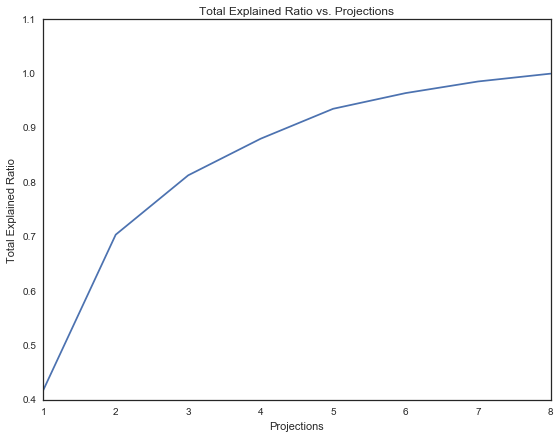

n =  1 ,  0.417567667827
n =  2 ,  0.703744229551
n =  3 ,  0.81292151032
n =  4 ,  0.880288631793
n =  5 ,  0.935343994497
n =  6 ,  0.964226230288
n =  7 ,  0.985606242545
n =  8 ,  1.0


In [32]:
from sklearn.decomposition import PCA
new_input_df = input_df.copy()
new_input_df = preprocessing.normalize(new_input_df[features_selected].copy())
print 'selected features:', features_selected
fc.explained_ratio_pca(new_input_df)

<h4>PCA: Projections to 3 dimensions (Both Genders)</h4>

In [33]:
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components = 3)
pca.fit(X = new_input_df, y = target_df)
transformed_new_input_df = pca.fit_transform(X = new_input_df, y = target_df)
transformed_pca = pd.DataFrame(transformed_new_input_df, columns = ['x_s', 'y_s', 'z_s'])

<h4>Plotting Chosen Features on PCA (Both Genders)</h4>

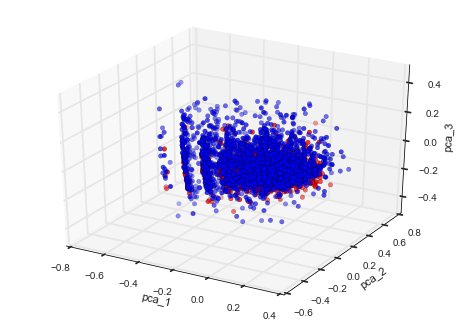

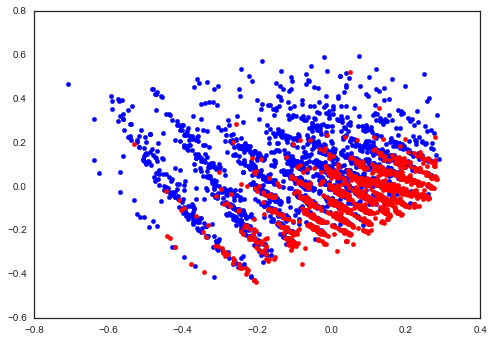

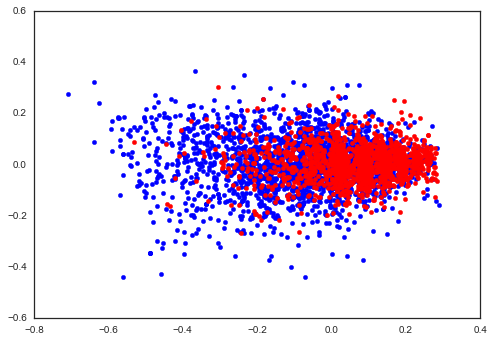

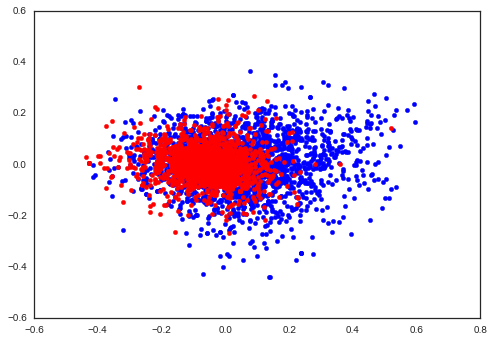

In [34]:
fc.pca_plotter(transformed_pca, target_df)

<h4>Nearest Neighboor Alogorithm: Gridsearch for first 100 neighboors (Both Genders)</h4>

In [35]:
new_input_df = input_df.copy()
new_input_df = preprocessing.normalize(new_input_df[features_selected].copy())
fc.apply_nearest_neighbor(transformed_pca, target_df)

Training set size:  3575 Test set size:  1192
Best f1_score:  0.714430129462
With neighboors at:  {'n_neighbors': 63}
Best Estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=63, p=2,
           weights='uniform')
Test Size:  1192
Accuracy: 0.751677852349
             precision    recall  f1-score   support

          0       0.79      0.75      0.77       664
          1       0.71      0.75      0.73       528

avg / total       0.75      0.75      0.75      1192



<h4>Normalization features: PCA (Females)</h4>

selected features: ['like', 'attr', 'intel', 'shar', 'sinc', 'amb', 'fun', 'prob']
Components: [[ 0.26480658 -0.11216233 -0.39180585  0.00343076 -0.20729069 -0.4064381
  -0.12651086  0.73457956]]
Explained Variance: [ 0.02953694]
Explained Ratio:  [ 0.40508264]
Components: [[ 0.26480658 -0.11216233 -0.39180585  0.00343076 -0.20729069 -0.4064381
  -0.12651086  0.73457956]
 [-0.77708987 -0.04773515  0.19808284 -0.111958    0.11205596  0.2254995
  -0.07327899  0.52278572]]
Explained Variance: [ 0.02953694  0.02181002]
Explained Ratio:  [ 0.40508264  0.29911218]
Components: [[ 0.26480658 -0.11216233 -0.39180585  0.00343076 -0.20729069 -0.4064381
  -0.12651086  0.73457956]
 [-0.77708987 -0.04773515  0.19808284 -0.111958    0.11205596  0.2254995
  -0.07327899  0.52278572]
 [ 0.28943896 -0.07721491  0.12271856 -0.85976567  0.08882523  0.20861231
  -0.32111158  0.03852828]]
Explained Variance: [ 0.02953694  0.02181002  0.00795366]
Explained Ratio:  [ 0.40508264  0.29911218  0.10907998]
Compone

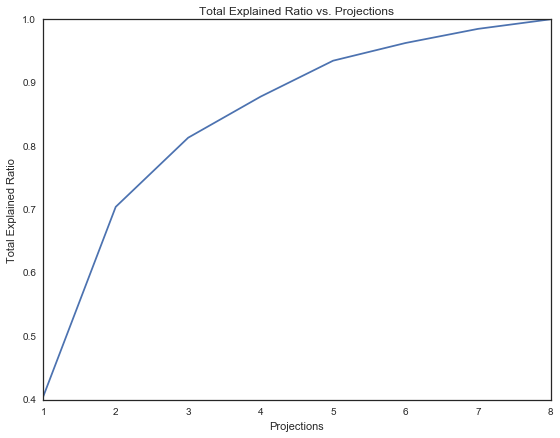

n =  1 ,  0.405082640248
n =  2 ,  0.704194817863
n =  3 ,  0.813274799001
n =  4 ,  0.878096088404
n =  5 ,  0.934726519013
n =  6 ,  0.962659237176
n =  7 ,  0.984925852194
n =  8 ,  1.0


In [36]:
new_input_df = women_men.copy()
women_new_input_df = new_input_df[new_input_df['gender'] == 0].copy()
women_new_input_df = preprocessing.normalize(women_new_input_df[features_selected].copy())
print 'selected features:', features_selected
fc.explained_ratio_pca(women_new_input_df)

<h4>PCA: Projections to 3 dimensions (Females)</h4>

In [37]:
women_target_df = women_men[women_men['gender'] == 0]['dec'].copy()
pca = PCA(n_components = 3)
pca.fit(X = women_new_input_df, y = women_target_df)
transformed_new_input_df = pca.fit_transform(X = women_new_input_df, y = women_target_df)
transformed_pca = pd.DataFrame(transformed_new_input_df, columns = ['x_s', 'y_s', 'z_s'])

<h4>Plotting Chosen Features on PCA (Females)</h4>

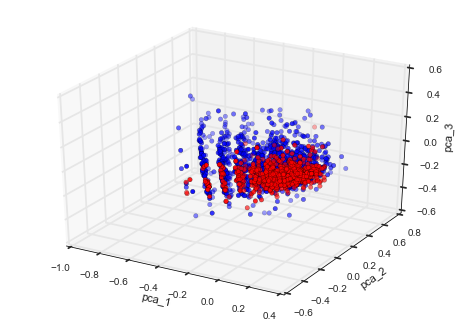

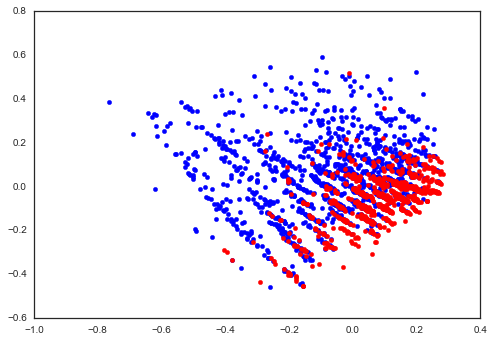

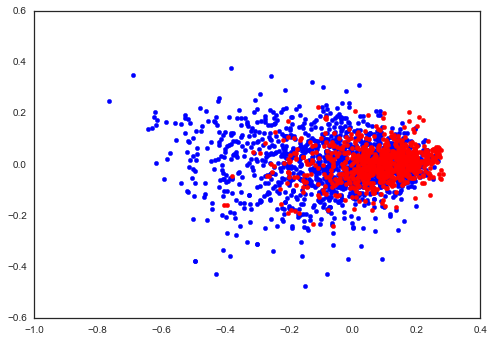

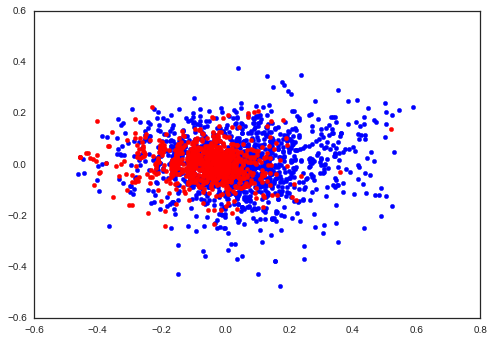

In [38]:
fc.pca_plotter(transformed_pca, women_target_df)

<h4>Nearest Neighboor Alogorithm: Gridsearch for first 100 neighboors (Females)</h4>

In [39]:
fc.apply_nearest_neighbor(transformed_pca, women_target_df)

Training set size:  1857 Test set size:  619
Best f1_score:  0.684668570458
With neighboors at:  {'n_neighbors': 79}
Best Estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=79, p=2,
           weights='uniform')
Test Size:  619
Accuracy: 0.752827140549
             precision    recall  f1-score   support

          0       0.81      0.80      0.80       393
          1       0.66      0.68      0.67       226

avg / total       0.75      0.75      0.75       619



<h4>Normalization features: PCA (Males)</h4>

selected features: ['like', 'attr', 'intel', 'shar', 'sinc', 'amb', 'fun', 'prob']
Components: [[-0.10330095  0.14683406  0.33046932  0.0284961   0.2123399   0.31624007
   0.22887858 -0.81256707]]
Explained Variance: [ 0.02621169]
Explained Ratio:  [ 0.44385406]
Components: [[ -1.03300953e-01   1.46834063e-01   3.30469324e-01   2.84960986e-02
    2.12339901e-01   3.16240067e-01   2.28878582e-01  -8.12567075e-01]
 [  8.22789382e-01   1.85433715e-04  -2.65995841e-01  -2.38693781e-03
   -1.93272448e-01  -2.65607437e-01  -3.96307118e-02  -3.77870308e-01]]
Explained Variance: [ 0.02621169  0.01567048]
Explained Ratio:  [ 0.44385406  0.26535501]
Components: [[ -1.03300953e-01   1.46834063e-01   3.30469324e-01   2.84960986e-02
    2.12339901e-01   3.16240067e-01   2.28878582e-01  -8.12567075e-01]
 [  8.22789382e-01   1.85433715e-04  -2.65995841e-01  -2.38693781e-03
   -1.93272448e-01  -2.65607437e-01  -3.96307118e-02  -3.77870308e-01]
 [ -1.40087068e-01  -7.07157858e-02  -1.62979155e-01   9.5

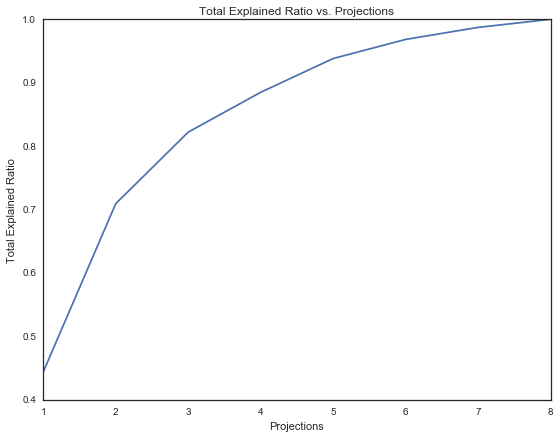

n =  1 ,  0.443854062095
n =  2 ,  0.709209071051
n =  3 ,  0.822015776535
n =  4 ,  0.884848719768
n =  5 ,  0.93812065322
n =  6 ,  0.968254356042
n =  7 ,  0.987228983007
n =  8 ,  1.0


In [40]:
new_input_df = women_men.copy()
men_new_input_df = new_input_df[new_input_df['gender'] == 1].copy()
men_new_input_df = preprocessing.normalize(men_new_input_df[features_selected].copy())
print 'selected features:', features_selected
fc.explained_ratio_pca(men_new_input_df)

<h4>PCA: Projections to 3 dimensions (Males)</h4>

In [41]:
men_target_df = women_men[women_men['gender'] == 1]['dec'].copy()
pca = PCA(n_components = 3)
pca.fit(X = men_new_input_df, y = men_target_df)
transformed_new_input_df = pca.fit_transform(X = men_new_input_df, y = men_target_df)
transformed_pca = pd.DataFrame(transformed_new_input_df, columns = ['x_s', 'y_s', 'z_s'])

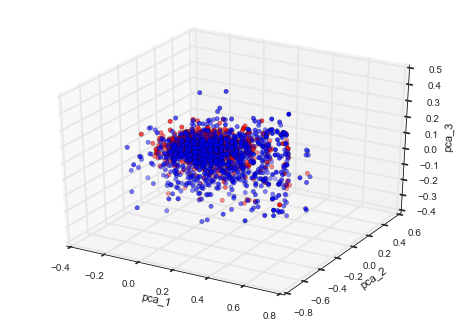

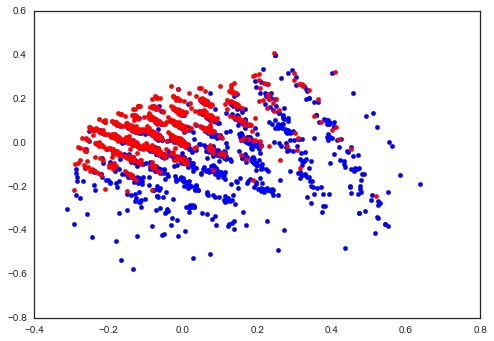

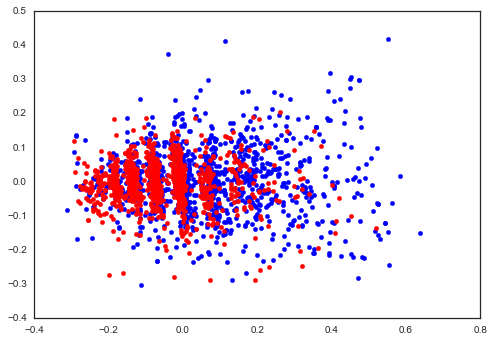

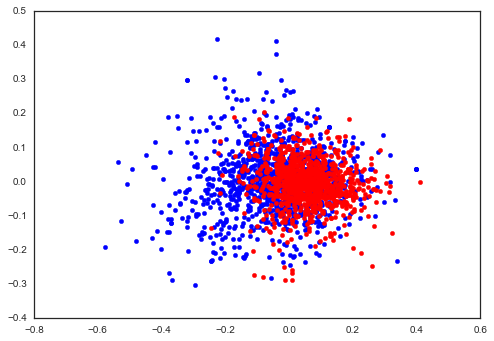

In [42]:
fc.pca_plotter(transformed_pca, men_target_df)

<h4>Nearest Neighboor Alogorithm: Gridsearch for first 100 neighboors (Males)</h4>

In [43]:
fc.apply_nearest_neighbor(transformed_pca, men_target_df)

Training set size:  1718 Test set size:  573
Best f1_score:  0.774573433621
With neighboors at:  {'n_neighbors': 94}
Best Estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=94, p=2,
           weights='uniform')
Test Size:  573
Accuracy: 0.771378708551
             precision    recall  f1-score   support

          0       0.81      0.74      0.77       300
          1       0.74      0.81      0.77       273

avg / total       0.77      0.77      0.77       573



<h3>Linear Classifier on Scaled Features</h3>

<h4>Linear Classifier: Both Genders (three features to compare with benchmark)</h4>

In [44]:
fc.linear_classifier(input_df[['attr', 'amb', 'intel']], target_df)

[{'C': array([  1.00000000e-02,   2.78255940e-02,   7.74263683e-02,
         2.15443469e-01,   5.99484250e-01,   1.66810054e+00,
         4.64158883e+00,   1.29154967e+01,   3.59381366e+01,
         1.00000000e+02])}]


C:\Users\Henry\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Best f1_score:  0.628237647132
Best C:  {'C': 35.938136638046259}
Best Estimator:  SVC(C=35.938136638046259, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)
Retrain on Best C:  35.938136638
Coefficients:  [[ 10.99986788  -6.66868821 -17.3551051 ]]
Intercept:  [ 4.71620589]
Test Size:  1192
Accuracy: 0.679530201342
             precision    recall  f1-score   support

          0       0.72      0.69      0.71       664
          1       0.63      0.66      0.65       528

avg / total       0.68      0.68      0.68      1192



<h4>Linear Classifier: Females (three features to compare with benchmark)</h4>

In [45]:
women_input_df = women_men[women_men['gender'] == 0].copy()
women_target_df = women_men[women_men['gender'] == 0]['dec'].copy()
fc.linear_classifier(women_input_df[['attr', 'amb', 'intel']], women_target_df)

[{'C': array([  1.00000000e-02,   2.78255940e-02,   7.74263683e-02,
         2.15443469e-01,   5.99484250e-01,   1.66810054e+00,
         4.64158883e+00,   1.29154967e+01,   3.59381366e+01,
         1.00000000e+02])}]
Best f1_score:  0.407467800295
Best C:  {'C': 100.0}
Best Estimator:  SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)
Retrain on Best C:  100.0
Coefficients:  [[  4.89413485  -6.18471432 -14.10168211]]
Intercept:  [ 4.40328126]
Test Size:  619
Accuracy: 0.688206785137
             precision    recall  f1-score   support

          0       0.71      0.86      0.78       393
          1       0.62      0.38      0.47       226

avg / total       0.68      0.69      0.67       619



<h4>Linear Classifier: Males (three features to compare with benchmark)</h4>

In [46]:
men_input_df = women_men[women_men['gender'] == 1].copy()
men_target_df = women_men[women_men['gender'] == 1]['dec'].copy()
fc.linear_classifier(men_input_df[['attr', 'amb', 'intel']], men_target_df)

[{'C': array([  1.00000000e-02,   2.78255940e-02,   7.74263683e-02,
         2.15443469e-01,   5.99484250e-01,   1.66810054e+00,
         4.64158883e+00,   1.29154967e+01,   3.59381366e+01,
         1.00000000e+02])}]
Best f1_score:  0.725637670526
Best C:  {'C': 0.59948425031894093}
Best Estimator:  SVC(C=0.59948425031894093, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)
Retrain on Best C:  0.599484250319
Coefficients:  [[ 6.91818127 -4.30971268 -8.04742742]]
Intercept:  [ 2.45300144]
Test Size:  573
Accuracy: 0.694589877836
             precision    recall  f1-score   support

          0       0.82      0.54      0.65       300
          1       0.63      0.87      0.73       273

avg / total       0.73      0.69      0.69       573



<h1>More Things to Explore</h1>

<h4>People who put over 90% on Physical Attractiveness</h4>

In [47]:
data_copy[['iid', 'gender', 'wave', 'attr1_1',	'intel1_1', 'sinc1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'pid']][data_copy['attr1_1'] >= 90].drop_duplicates(subset = 'iid', keep = 'first')

,iid,gender,wave,attr1_1,intel1_1,sinc1_1,fun1_1,amb1_1,shar1_1,pid
190,20,1,1,100.0,0.0,0.0,0.0,0.0,0.0,1.0
3471,241,0,10,90.0,2.0,2.0,2.0,2.0,2.0,243.0


<h2>Create Matched People DataFrame</h2>

In [48]:
people_matched = data_copy[data_copy['match'] == 1].copy()
people_matched.drop_duplicates(subset = 'iid', keep = 'first', inplace = True)
print 'Number of people who got matches:', str(people_matched['iid'].count())
#display(people_matched)

Number of people who got matches: 445


In [49]:
#people_matched.describe()

<h4>Get Index for 'iid' for non-matches</h4>

In [50]:
number = [int(i) for i in people_matched['iid']]
not_ever_matched = [i for i in range(1,553) if i not in number]
print 'Number of people not matched:', str(len(not_ever_matched))

Number of people not matched: 107


In [51]:
people_not_matched = data_copy[data_copy['iid'].isin(not_ever_matched)].copy()

In [52]:
#fc.dating_attributes_vs_time_describe(people_not_matched, 0)

<h4>How Females Rated</h4>

In [53]:
people_not_matched[people_not_matched['gender'] == 0][['attr', 'intel', 'amb', 'sinc', 'fun', 'shar']].describe()

,attr,intel,amb,sinc,fun,shar
count,749.000000,727.000000,708.000000,738.000000,717.000000,673.000000
mean,16.112777,20.433273,19.002480,19.094693,16.317165,12.973989
std,6.653760,4.849262,4.810267,5.059904,4.502787,4.694477
min,0.000000,8.333333,4.761905,4.347826,0.000000,0.000000
25%,12.903226,17.500000,16.666667,16.666667,14.285714,9.756098
50%,15.686275,19.444444,18.367347,18.181818,16.666667,13.513514
75%,18.000000,21.951220,21.052632,20.930233,18.421053,16.000000
max,100.000000,58.333333,58.333333,47.058824,40.000000,33.333333


In [54]:
#fc.dating_attributes_vs_time_hist(people_not_matched, 0)

In [55]:
#fc.dating_attributes_vs_time_describe(people_not_matched, 1)

<h4>How Males Rated</h4>

In [56]:
people_not_matched[people_not_matched['gender'] == 1][['attr', 'intel', 'amb', 'sinc', 'fun', 'shar']].describe()

,attr,intel,amb,sinc,fun,shar
count,583.000000,574.000000,534.000000,558.000000,562.000000,484.000000
mean,17.992472,19.722672,17.454976,19.202428,17.351327,13.847557
std,6.766539,4.553461,4.170224,4.000455,3.589344,4.905026
min,3.448276,6.521739,5.405405,6.060606,5.714286,0.000000
25%,14.634146,17.142857,15.151515,17.090592,15.384615,11.111111
50%,17.241379,18.918919,17.021277,18.750000,17.142857,13.953488
75%,20.000000,21.212121,19.444444,20.588235,18.918919,16.216216
max,100.000000,53.846154,50.000000,66.666667,35.294118,45.454545


In [57]:
#fc.dating_attributes_vs_time_hist(people_not_matched, 1)

In [58]:
display(people_not_matched[['iid', 'gender', 'attr', 'intel', 'amb', 'sinc', 'shar', 'fun', 'dec', 
                            'dec_o', 'pid', 'attr_o', 'intel_o', 'amb_o', 'sinc_o', 'shar_o', 'fun_o' ]])

,iid,gender,attr,intel,amb,sinc,shar,fun,dec,dec_o,pid,attr_o,intel_o,amb_o,sinc_o,shar_o,fun_o
20,3,0,14.000000,20.000000,16.000000,18.000000,18.000000,14.000000,0,0,11.0,18.421053,15.789474,21.052632,21.052632,10.526316,13.157895
21,3,0,18.367347,18.367347,18.367347,14.285714,14.285714,16.326531,0,0,12.0,15.000000,25.000000,15.000000,17.500000,12.500000,15.000000
22,3,0,14.583333,18.750000,18.750000,18.750000,14.583333,14.583333,0,1,13.0,16.666667,16.666667,16.666667,16.666667,16.666667,16.666667
23,3,0,18.750000,18.750000,18.750000,14.583333,14.583333,14.583333,0,1,14.0,14.583333,16.666667,16.666667,18.750000,16.666667,16.666667
24,3,0,15.254237,16.949153,16.949153,16.949153,16.949153,16.949153,0,1,15.0,20.000000,26.666667,NaN,33.333333,NaN,20.000000
25,3,0,15.094340,18.867925,16.981132,18.867925,16.981132,13.207547,0,1,16.0,18.918919,16.216216,16.216216,16.216216,16.216216,16.216216
26,3,0,16.000000,20.000000,14.000000,18.000000,18.000000,14.000000,0,0,17.0,22.222222,18.518519,18.518519,11.111111,14.814815,14.814815
27,3,0,14.285714,18.367347,18.367347,18.367347,14.285714,16.326531,0,0,18.0,13.793103,20.689655,20.689655,17.241379,13.793103,13.793103
28,3,0,16.666667,16.666667,16.666667,16.666667,16.666667,16.666667,0,1,19.0,16.666667,14.285714,16.666667,16.666667,16.666667,19.047619
29,3,0,17.021277,19.148936,19.148936,14.893617,14.893617,14.893617,0,0,20.0,13.157895,21.052632,21.052632,15.789474,15.789474,13.157895


<h1>Revisiting 'Yes' & 'No' Responses</h1>

In [59]:
"""no_decision = data_copy[data_copy['dec'] == 0].index
yes_decision = data_copy[data_copy['dec'] == 1].index
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(data_copy[['attr', 'amb', 'intel']].loc[no_decision]['attr'], data_copy[['attr', 'amb', 'intel']].loc[no_decision]['amb'], data_copy[['attr', 'amb', 'intel']].loc[no_decision]['intel'], c = 'blue')
ax.scatter(data_copy[['attr', 'amb', 'intel']].loc[yes_decision]['attr'], data_copy[['attr', 'amb', 'intel']].loc[yes_decision]['amb'], data_copy[['attr', 'amb', 'intel']].loc[yes_decision]['intel'], c = 'red')
ax.set_xlabel('attr')
ax.set_ylabel('amb')
ax.set_zlabel('intel')
for ii in xrange(0,360,5):
	ax.view_init(elev = 10, azim = ii)
	plt.savefig("movie_4%d.png" % ii)
	plt.draw()
plt.show()"""

'no_decision = data_copy[data_copy[\'dec\'] == 0].index\nyes_decision = data_copy[data_copy[\'dec\'] == 1].index\nfig = plt.figure()\nax = fig.add_subplot(111, projection = \'3d\')\nax.scatter(data_copy[[\'attr\', \'amb\', \'intel\']].loc[no_decision][\'attr\'], data_copy[[\'attr\', \'amb\', \'intel\']].loc[no_decision][\'amb\'], data_copy[[\'attr\', \'amb\', \'intel\']].loc[no_decision][\'intel\'], c = \'blue\')\nax.scatter(data_copy[[\'attr\', \'amb\', \'intel\']].loc[yes_decision][\'attr\'], data_copy[[\'attr\', \'amb\', \'intel\']].loc[yes_decision][\'amb\'], data_copy[[\'attr\', \'amb\', \'intel\']].loc[yes_decision][\'intel\'], c = \'red\')\nax.set_xlabel(\'attr\')\nax.set_ylabel(\'amb\')\nax.set_zlabel(\'intel\')\nfor ii in xrange(0,360,5):\n\tax.view_init(elev = 10, azim = ii)\n\tplt.savefig("movie_4%d.png" % ii)\n\tplt.draw()\nplt.show()'

In [60]:
import scipy.stats as stats
for i in fc.feature_space:
    print 'Investigating Feature: ', str(i)
    print stats.f_oneway(women_men[women_men['gender'] == 0][i], women_men[women_men['gender'] == 1][i])

Investigating Feature:  iid
F_onewayResult(statistic=6.4374416684514904, pvalue=0.011205566151547046)
Investigating Feature:  gender
F_onewayResult(statistic=inf, pvalue=0.0)
Investigating Feature:  race
F_onewayResult(statistic=23.118674494288364, pvalue=1.5699483475215827e-06)
Investigating Feature:  field_cd
F_onewayResult(statistic=54.913997792072117, pvalue=1.4816794018616323e-13)
Investigating Feature:  career_c
F_onewayResult(statistic=3.3776558813913944, pvalue=0.06614820510249074)
Investigating Feature:  zipcode
F_onewayResult(statistic=5.6457682261498503, pvalue=0.017536851187436867)
Investigating Feature:  goal
F_onewayResult(statistic=1.9583877829757401, pvalue=0.16175094119297279)
Investigating Feature:  met
F_onewayResult(statistic=0.12035646851363942, pvalue=0.72866351193023515)
Investigating Feature:  go_out
F_onewayResult(statistic=4.7845330592069235, pvalue=0.028764866347951099)
Investigating Feature:  date
F_onewayResult(statistic=64.576001628747363, pvalue=1.1614257